In [3]:
import numpy as np, datetime as dt
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [4]:
def text():
    text2 = text1.strip().split('\n')
    for i in range(len(text2)):
        text2[i] = text2[i].split(' -> ')
    text3 = []
    for row in text2:
        Row = [row[0]]
        Row.extend(row[1].split(' -- '))
        text3.append(Row)
    TODAY = dt.datetime.today().strftime('%d/%m/%Y-')
    a = dt.datetime.strptime(TODAY+text3[0][0],'%d/%m/%Y-%H:%M:%S.%f').timestamp()
    for i in range(len(text3)):
        text3[i][0] = dt.datetime.strptime(TODAY+text3[i][0],'%d/%m/%Y-%H:%M:%S.%f').timestamp() - a
        for j in range(len(text3[0])):
            text3[i][j] = float(text3[i][j])
    dados = np.array(text3)  
    fig = plt.figure(figsize=(30, 12)) 
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4]) 
    plt.margins(0)
    ax0 = plt.subplot(gs[0])
    plt.box(False)
    ax0.plot(dados[:,0], 100-dados[:,3])
    ax0.set_label('de')
    ax0.set_ylabel('Potência (%)')
    ax1 = plt.subplot(gs[1])
    plt.box(False)
    ax1.plot(dados[:,0], dados[:,2],'r',dados[:,0], dados[:,1],'g',dados[:,0], dados[:,1]-5,'c,',dados[:,0], dados[:,1]+5,'c,')
    ax1.set_ylabel('Temperatura (°C)')
    ax1.set_xlabel('tempo (s)')
    ax1.legend(['temperatura','setpoint'])
    for i in range(1,len(dados[:,3])):
        if dados[i,3] != dados[i-1,3]:
            plt.axvline(x=dados[i,0],color='black',ls='--')  
    return fig 

/tmp/ipykernel_2292/517310051.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0])


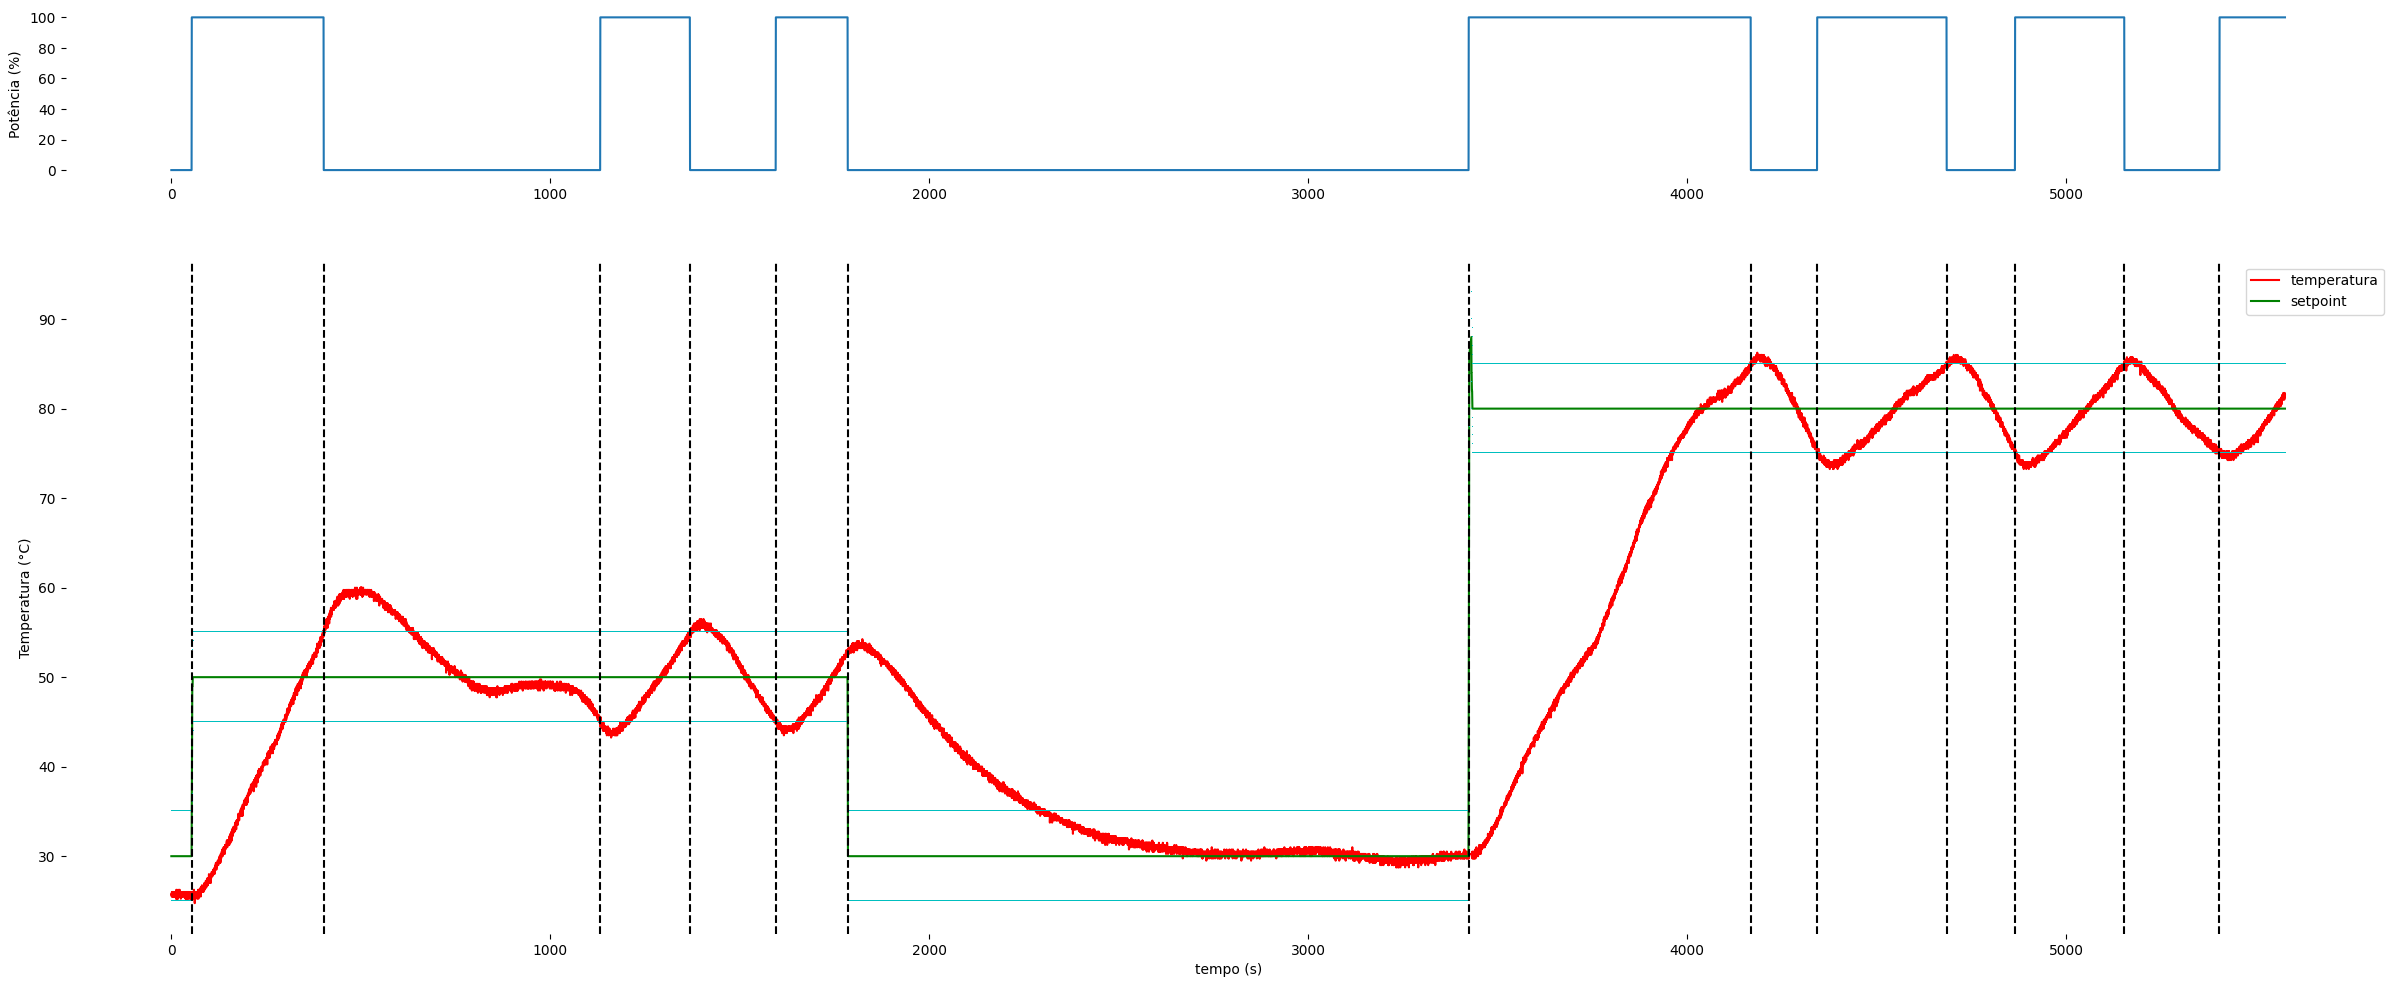

In [5]:
with open('onoff1.txt','r') as f:
    text1 = f.read()
fig = text()

/tmp/ipykernel_2292/517310051.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0])


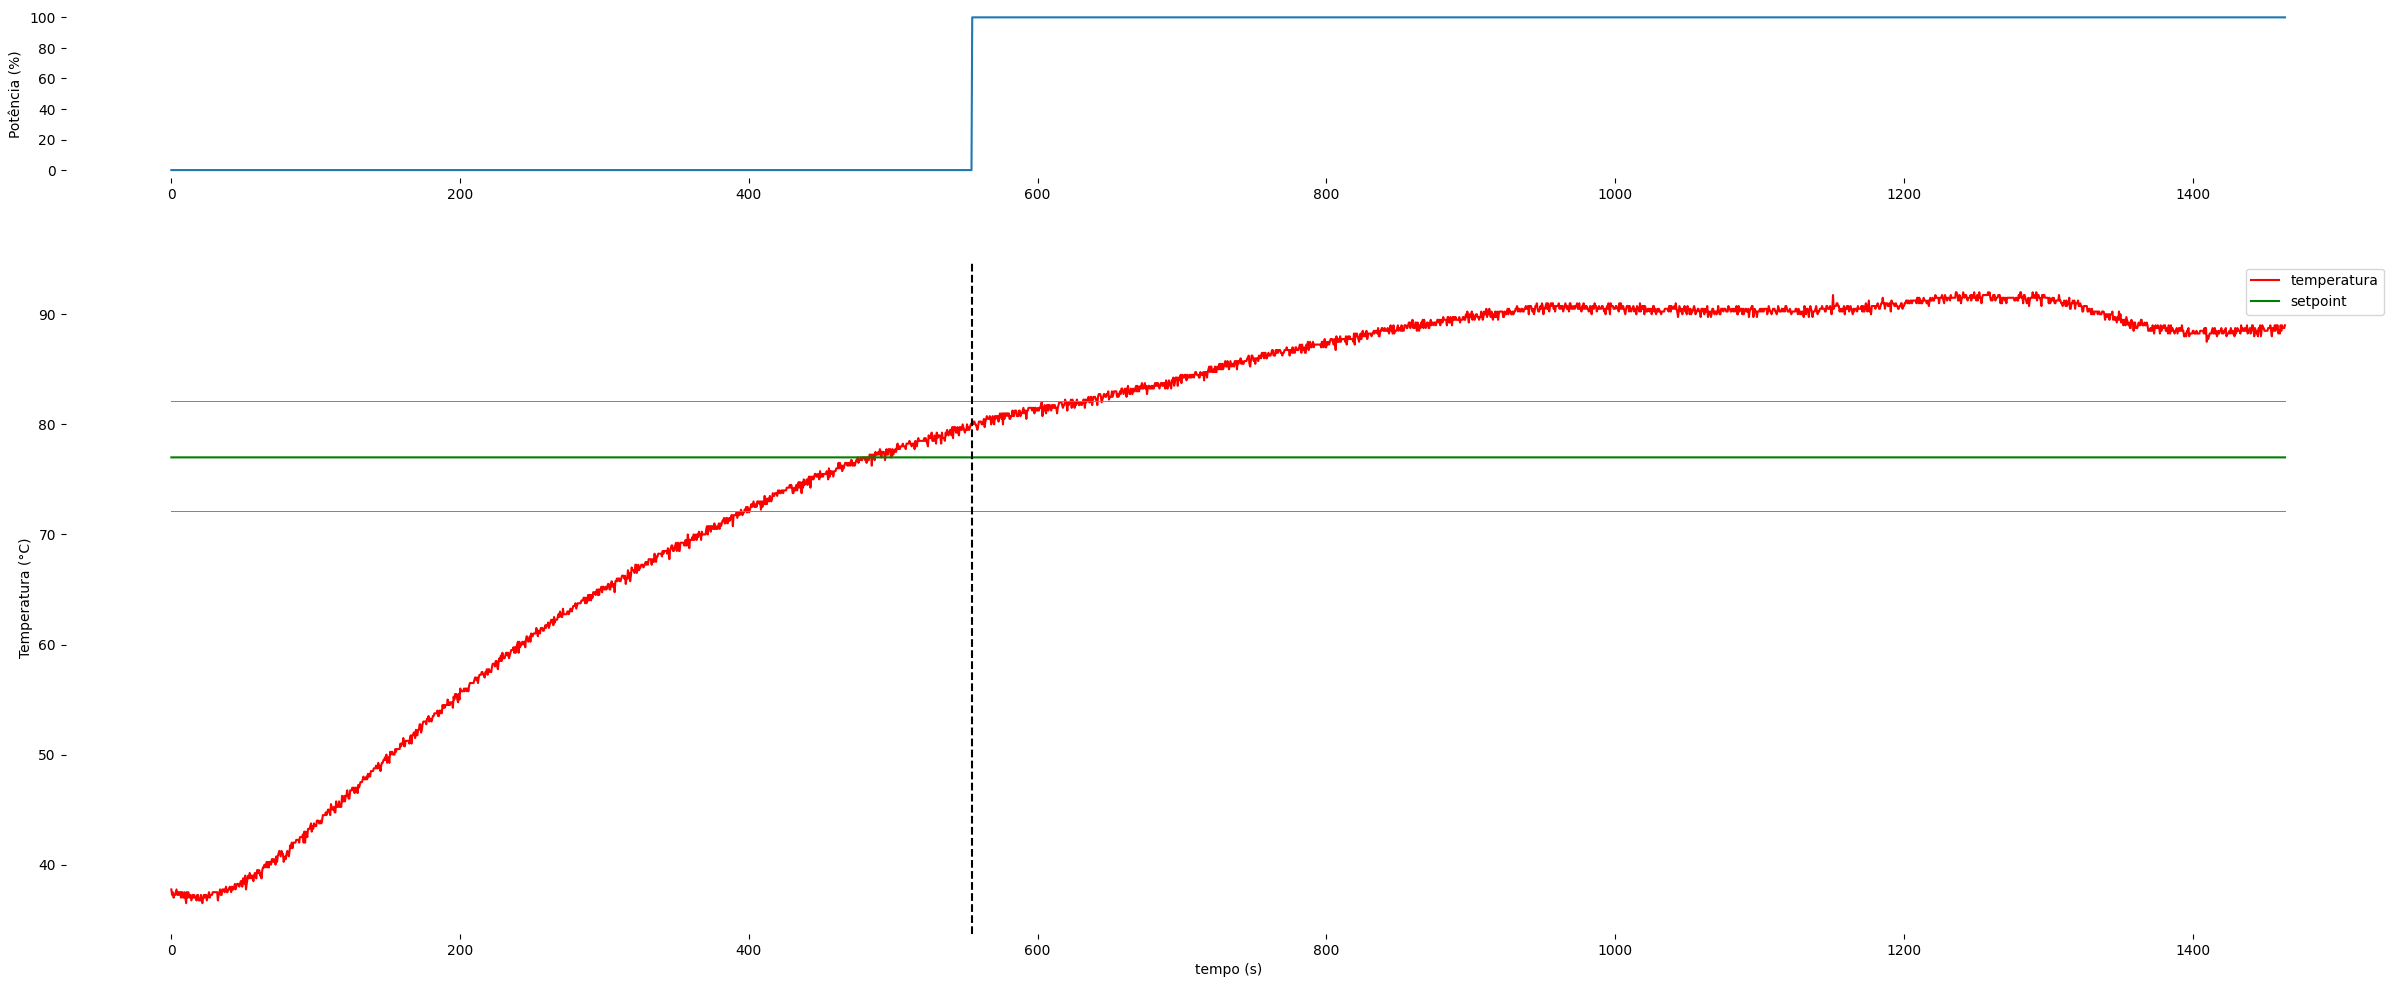

In [6]:
with open('onoff3.txt','r') as f:
    text1 = f.read()
fig = text()

/tmp/ipykernel_2292/517310051.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0])


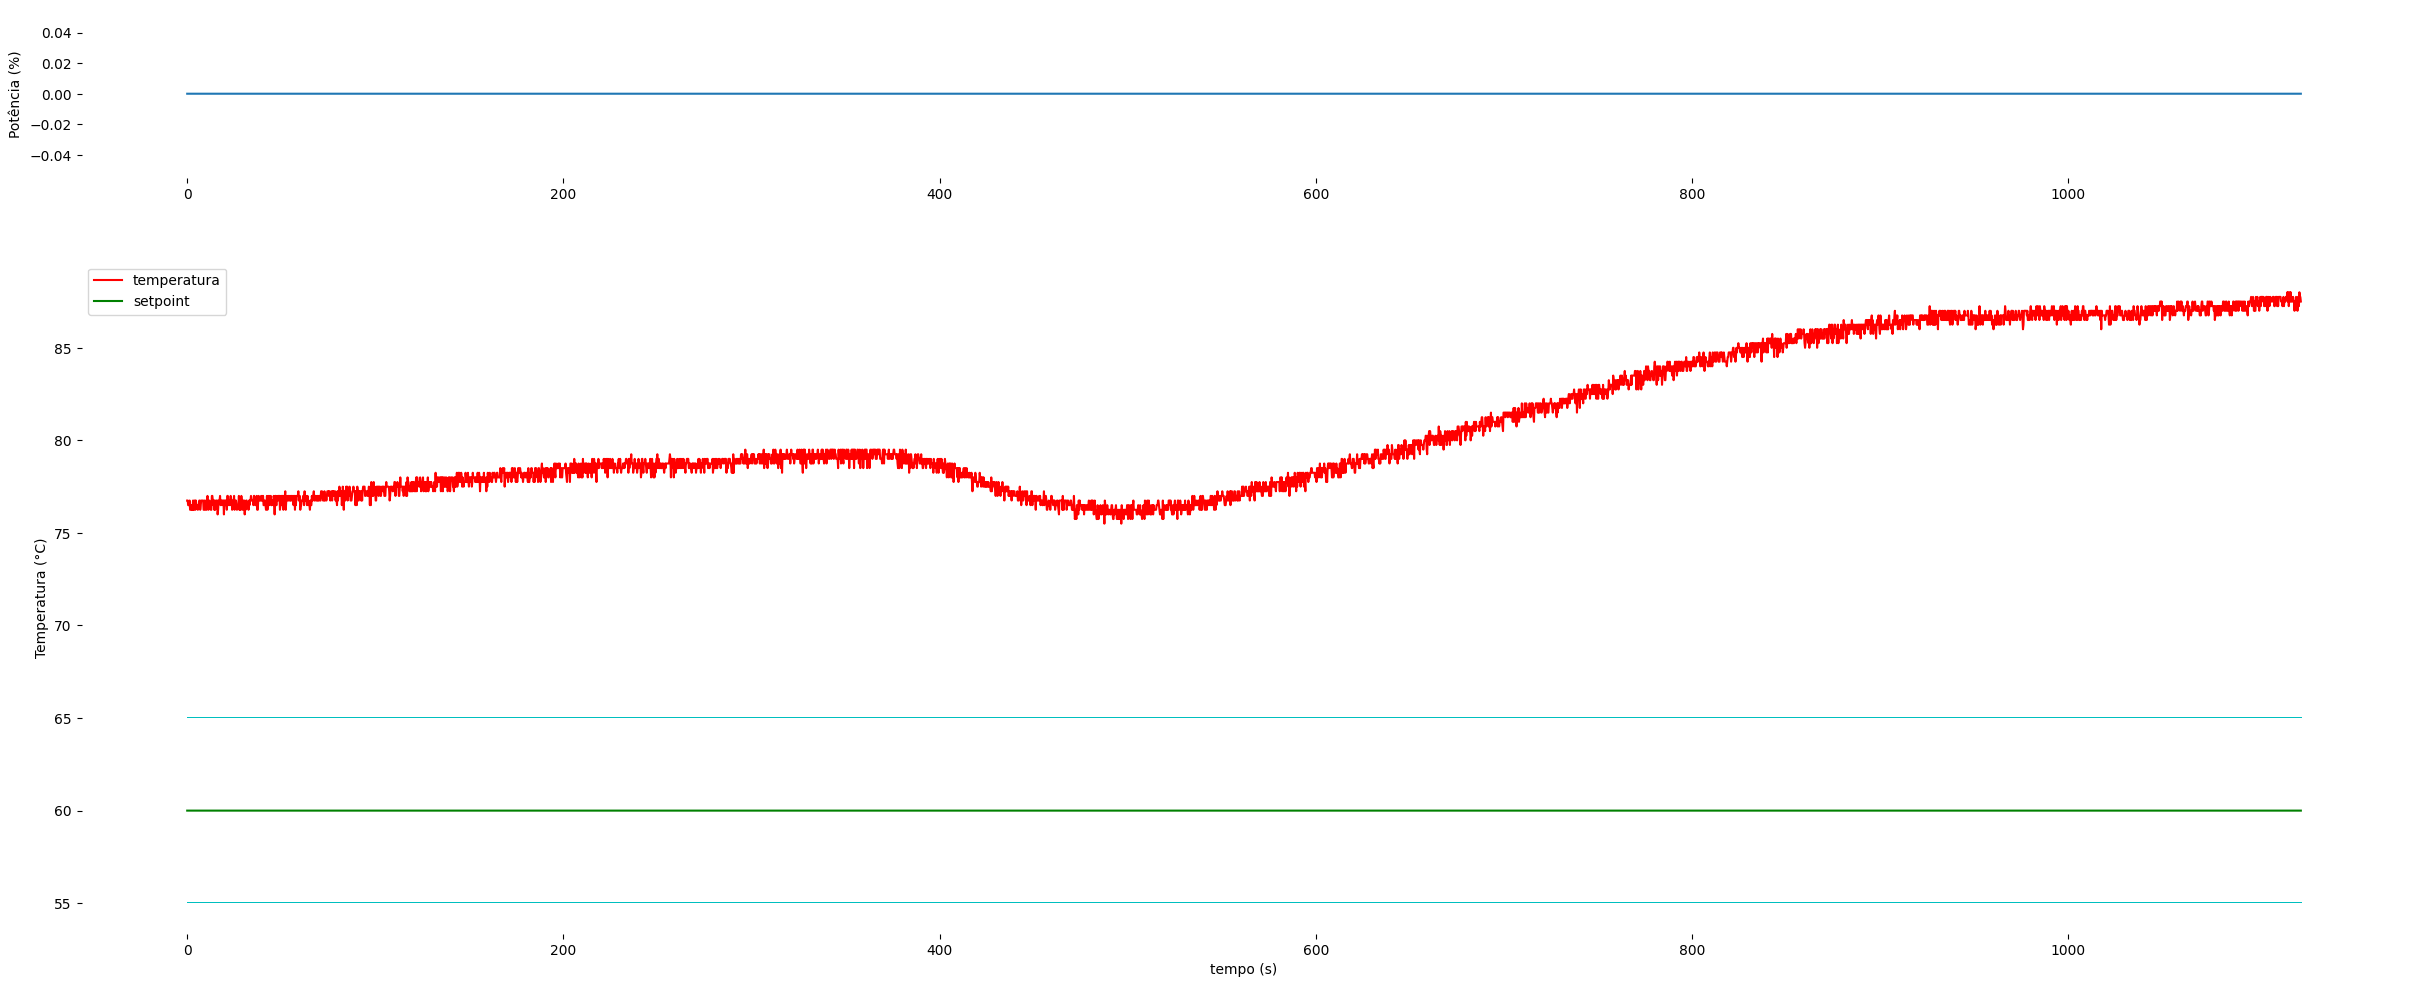

In [8]:
with open('onoff4','r') as f:
    text1 = f.read()
fig = text()

In [ ]:
fig.savefig('dimmer.png',facecolor='white',bbox_inches='tight')